# Time Series Analysis

### Basics of Time series data

#### 1. What is Time series data?
##### 2. Examples of time series data
#### 3. Lag Varaible and Lag plot
#### 4. Time series components

##### The Pandas datetime module provides three data types: date, time, and datetime.

A date is a moment in time consisting of year, month, and day. For instance, June 7, 2013 would be a date.

A time consists of hours, minutes, seconds, and microseconds. An example of time would be 12 hours and 30 minutes

A datetime consists of both the elements of a date and time together

### Python's datetime module

In [ ]:
import pandas as pd
import numpy as np
import datetime

In [ ]:
date = datetime.date(year=2013, month=6, day=7)
date

In [ ]:
time = datetime.time(hour=12, minute=30,second=19)
time

In [ ]:
dt = datetime.datetime(year=2013, month=6, day=7,hour=12, minute=30, second=19)
dt

#### Pandas Timestamp object

In [ ]:
pd.Timestamp(year=2012, month=12, day=21, hour=5,minute=10, second=8)

In [ ]:
pd.Timestamp('2016/1/10')

In [ ]:
pd.Timestamp('Jan 3, 2019 20:45.56')

#### to_datetime function

In [ ]:
pd.to_datetime('2015-5-13')

In [ ]:
pd.to_datetime(31, unit='D', origin='2013-1-1')

#### Slicing time series column in DataFrame

In [ ]:
crime = pd.read_hdf('crime.h5', 'crime')
crime

In [ ]:
crime.info()

In [ ]:
crime.dtypes

In [ ]:
crime = crime.set_index('REPORTED_DATE')

In [ ]:
crime

In [ ]:
#select all the rows equal to a single index by passing that value to the .loc attribute
crime.loc['2016-05-12 16:45:00']

In [ ]:
crime.loc['2016-05-12 03']

In [ ]:
#Partially match an index value. crimes on May 5, 2016,
crime.loc['2016-05-12']

In [ ]:
crime.loc['2016-05'].shape

In [ ]:
crime.loc['2016'].shape

In [ ]:
#The selection strings may also contain the name of the month:
crime.loc['Dec 2015'].sort_index()

In [ ]:
#slice notation to select a precise range of data.

crime.loc['2015-3-4':'2016-1-1'].sort_index()

#### Methods that only work with a DatetimeIndex

In [ ]:
crime = pd.read_hdf('crime.h5')

In [ ]:
crime.columns

In [ ]:
#Using Between
crime[crime.REPORTED_DATE.between('2016-05-12', '2016-05-13')]

In [ ]:
(crime[crime.REPORTED_DATE.between('2016', '2017')].shape)

In [ ]:
(crime[crime.REPORTED_DATE.between('2016-05-12 03', '2016-05-12 04')].shape)

In [ ]:
#There are a number of DataFrame and Series methods that only work with a DatetimeIndex.
#Make sure the datetime column is the index column
crime = (pd.read_hdf('crime.h5', 'crime').set_index('REPORTED_DATE') )

In [ ]:
type(crime.index)

In [ ]:
#.between_time method to select crimes between 2 A.M. and 5 A.M.

crime.between_time('2:00', '5:00')

In [ ]:
#.at_time method

crime.at_time('3:00')

In [ ]:
#.first methods provide an elegant way of 
#selecting the first n segments of time.

#Produces first 2 month data
crime_sort = crime.sort_index()
crime_sort.first(pd.offsets.MonthBegin(2))

In [ ]:
#offset alias
crime_sort.first('5D') # 5 days

In [ ]:
crime_sort.first('5B') # 5 business days

In [ ]:
# 7 weeks, with weeks ending on Sunday
crime_sort.first('7W') 

In [ ]:
# 3rd quarter start
crime_sort.first('3QS') 

### timeseries-offset-aliases
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
    

In [ ]:
# one year 
crime_sort.first('A') 

#### Counting the number of weekly crimes

In [ ]:
crime_sort = pd.read_hdf('crime.h5', 'crime').set_index('REPORTED_DATE').sort_index()

In [ ]:
crime_sort

In [ ]:
#.resample method is very similar to the object produced after calling the .groupby method
grouped_by_week =crime_sort.resample('W')

In [ ]:
grouped_by_week.size()

In [ ]:
crime_sort.resample('m').size()

In [ ]:
crime_sort.resample('A').size()

In [ ]:
#USING GROUP BY METHOD
weekly_crimes = (crime_sort.query('IS_TRAFFIC==1')
                 .groupby(pd.Grouper(freq='W'))
                 .size()
                )

In [ ]:
weekly_crimes

In [ ]:
#Traffic crimes 
weekly_crimes = (crime_sort.query('IS_CRIME==1')
                 .groupby(pd.Grouper(freq='W'))
                 .size()
                )

In [ ]:
weekly_crimes

In [ ]:
#plot the weekly crimes
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(16, 4))


weekly_crimes.plot(title='All Denver Crimes')

#### Aggregating weekly crime and traffic accidents separately

In [ ]:
crime = pd.read_hdf('crime.h5').set_index('REPORTED_DATE').sort_index()

In [ ]:
crime

In [ ]:
#.resample method to group by each quarter
(crime
 .resample('Q')[['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
)


In [ ]:
#Which crime is more
(crime
 .resample('Q')[['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
 .assign(crimes = lambda df:np.where(df.IS_CRIME > df.IS_TRAFFIC,"IS_CRIME",'IS_TRAFFIC'))
)


In [ ]:
#Let's make a plot to visualize the trends
fig, ax = plt.subplots(figsize=(16, 4))


(crime
 .groupby(pd.Grouper(freq='Q'))[['IS_CRIME', 'IS_TRAFFIC']]
 .sum() 
 .plot(color=['green', 'blue'], ax=ax,title='Crimes and Traffic Accidents') )


In [ ]:
#Save the fig
#fig.savefig('c12-crimes2.png', dpi=300)

#### Measuring crime by weekday and year

In [ ]:
crime = pd.read_hdf('crime.h5', 'crime')

In [ ]:
(crime['REPORTED_DATE'].dt.day_name().value_counts())

In [ ]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

(crime['REPORTED_DATE']
.dt.day_name()
.value_counts()
.reindex(days)
.plot.barh(ax=ax)
)

In [ ]:
crime['REPORTED_DATE'].dt.year.value_counts().sort_index()

In [ ]:
crime['REPORTED_DATE'].dt.month.value_counts().sort_index()

In [ ]:
(crime
 .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
           crime['REPORTED_DATE'].dt.day_name().rename('day')])
 .size()
)

In [ ]:
(crime
 .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
           crime['REPORTED_DATE'].dt.day_name().rename('day')])
 .size()
 .unstack('day')
)

In [ ]:
#Let us comprehend using heatmap

table_days = (crime
.groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
          crime['REPORTED_DATE'].dt.day_name().rename('day')])
.size()
.unstack('day')
.reindex(columns=days)
)

In [ ]:
table_days

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(table_days, cmap='Greys', ax=ax)

In [ ]:

table_month = (crime
.groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
          crime['REPORTED_DATE'].dt.month.rename('month')])
.size()
.unstack('month')
)

In [ ]:
table_month

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(table_month, cmap='Greys', ax=ax)

In [ ]:
#Look at specific types of crimes - auto-theft
crime['OFFENSE_CATEGORY_ID'].value_counts()

In [ ]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']

In [ ]:
crime_type = 'auto-theft'

In [ ]:
auto_theft = (crime
 .query('OFFENSE_CATEGORY_ID == @crime_type')
 .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
  crime['REPORTED_DATE'].dt.day_name().rename('day')])
 .size()
 .unstack('day')
 .reindex(columns=days)
)

In [ ]:
auto_theft

In [ ]:
crime.head()

# Let us do forecast of crimes

In [ ]:
crime_sort = pd.read_hdf('crime.h5', 'crime').set_index('REPORTED_DATE').sort_index()

In [ ]:
crime_sort.groupby(['OFFENSE_CATEGORY_ID'])['IS_CRIME'].count()

In [ ]:
#.resample method is very similar to the object produced after calling the .groupby method
crime_type = 'traffic-accident'
crime_sort_traf=crime_sort.query('OFFENSE_CATEGORY_ID==@crime_type')

In [ ]:
crime_sort_traf

In [ ]:
grouped_by_day =crime_sort_traf.resample('D')

In [ ]:
day_crime_traf

In [ ]:
day_crime_traf=grouped_by_day.size()

In [ ]:
data_traf=day_crime_traf.loc['2016-01-02':'2017-09-28']

In [ ]:
data_traf

In [ ]:
#Let's make a plot to visualize the trends
fig, ax = plt.subplots(figsize=(16, 4))

data_traf.plot(color=['blue'], ax=ax,title='Traffic Accidents') 


In [ ]:
data_traf.describe()

In [ ]:
data_traf.hist()

In [ ]:
# create a scatter plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot

lag_plot(data_traf)
pyplot.show()

# 5-Step Forecasting Task

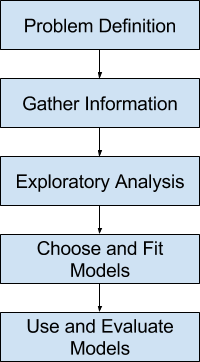

#### ARIMA Model

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

In [ ]:
pyplot.figure()
plot_acf(data_traf, lags=50)
pyplot.show()

In [ ]:
plot_pacf(data_traf, lags=50, ax=pyplot.gca())
pyplot.show()

#### Validation Dataset

In [ ]:
len(data_traf)

In [ ]:
split_point = len(data_traf) - 60

In [ ]:
split_point

In [ ]:
dataset, validation = data_traf[0:split_point], data_traf[split_point:]

In [ ]:
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

In [ ]:
####Autoreggresive AR Model

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error


In [ ]:
model_ar = AR(dataset)
model_ar_fit = model_ar.fit()

In [ ]:
predictions = model_ar_fit.predict(start=575,end=635)

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
plt.plot(validation)
plt.plot(predictions,color='red')

In [ ]:
# Forecast for next day
model_ar_fit.predict()[0]

##### ARIMA model

In [ ]:
# Build model on train and test it on validation data

In [ ]:
from statsmodels.tsa.arima_model import ARIMA


In [ ]:
model_arima = ARIMA(dataset,order=(2,0,3))
model_arima_fit = model_arima.fit(disp=0)

In [ ]:
model_arima_fit.aic

In [ ]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))

In [ ]:
pdq

#### Grid search of the p,d,q values


In [ ]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
for param in pdq:
    try:
        model_arima = ARIMA(dataset,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

In [ ]:
model_arima = ARIMA(dataset,order=(2,0,4))
model_arima_fit = model_arima.fit(disp=0)

In [ ]:
model_arima_fit.aic

In [ ]:
#Prediction for validation data
predictions = model_arima_fit.predict(start=575,end=635)

In [ ]:
predictions

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
plt.plot(validation)
plt.plot(predictions,color='red')


In [ ]:
forecast= model_arima_fit.forecast(steps=60)[0]

In [ ]:
forecast

## Forecast error : RMSE value

In [ ]:
rmse = np.mean((forecast - validation)**2)**.5
rmse

In [ ]:
plt.plot(forecast)

In [ ]:
#PLot all series together
fc, se, conf = model_arima_fit.forecast(60, alpha=0.05)

In [ ]:
# Make as pandas series
fc_series = pd.Series(fc, index=validation.index)
lower_series = pd.Series(conf[:, 0], index=validation.index)
upper_series = pd.Series(conf[:, 1], index=validation.index)

In [ ]:
# Plot
plt.figure(figsize=(25,6), dpi=100)
plt.plot(dataset[400:], label='training')
plt.plot(validation, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Combine train and test data and then build the model, forecast for next one month

In [ ]:
model_arima_final = ARIMA(data_traf,order=(2,0,4))
model_arima_fit_final = model_arima_final.fit(disp=0)

In [ ]:
forecast= model_arima_fit_final.forecast(steps=30)[0]

In [ ]:
forecast

In [ ]:
plt.plot(forecast)